<a href="https://colab.research.google.com/github/afrarafeeqa2004/machine-learning/blob/main/mazerobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

In [37]:
maze = [
    [0,0,0,0,0],
    [1,1,1,1,0],
    [0,0,0,1,0],
    [0,1,1,0,0],
    [0,0,0,1,0]
]
maze = np.array(maze)
start = (0,0)
goal = (4,4)
actions = [(0,1),(0,-1),(1,0),(-1,0)]  # R,L,D,U
n_actions = len(actions)

In [38]:
def in_bounds(pos):
    x,y = pos
    return 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1]

In [39]:
def step(state, a):
    x,y = state
    dx,dy = actions[a]
    nx,ny = x+dx, y+dy
    if not in_bounds((nx,ny)) or maze[nx,ny]==1:
        # collision, stay in place, negative reward
        return (x,y), -5, False
    if (nx,ny) == goal:
        return (nx,ny), 100, True
    return (nx,ny), -1, False

In [40]:
Q = defaultdict(lambda: np.zeros(n_actions))
alpha = 0.5
gamma = 0.99
epsilon = 0.2
n_episodes = 2000
max_steps = 200

In [41]:
for ep in range(n_episodes):
    state = start
    for t in range(max_steps):
        if random.random() < epsilon:
            action = random.randrange(n_actions)
        else:
            action = np.argmax(Q[state])
        next_state, reward, done = step(state, action)
        # Q-learning update
        Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])
        state = next_state
        if done:
            break
    # optional: decay epsilon
    epsilon = max(0.01, epsilon * 0.995)

In [42]:
state = start
path = [state]
for _ in range(50):
    a = np.argmax(Q[state])
    state, r, done = step(state, a)
    path.append(state)
    if done:
        print("Reached goal in", len(path)-1, "steps")
        break
else:
    print("Did not reach goal")
print("Path:", path)

Reached goal in 8 steps
Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


In [43]:
def plot_maze(path):
    maze_vis = maze.copy()
    for (x, y) in path:
        if (x, y) != start and (x, y) != goal:
            maze_vis[x, y] = 2  # mark path

    cmap = plt.cm.colors.ListedColormap(['white', 'black', 'green'])
    bounds = [0,1,2,3]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    plt.imshow(maze_vis, cmap=cmap, norm=norm)
    plt.xticks(np.arange(maze.shape[1]))
    plt.yticks(np.arange(maze.shape[0]))
    plt.grid(True, which='both', color='gray', linewidth=0.5)
    plt.gca().invert_yaxis()

    # Mark start & goal
    plt.text(start[1], start[0], 'S', ha='center', va='center', color='red', fontsize=12, fontweight='bold')
    plt.text(goal[1], goal[0], 'G', ha='center', va='center', color='yellow', fontsize=12, fontweight='bold')

    plt.show()

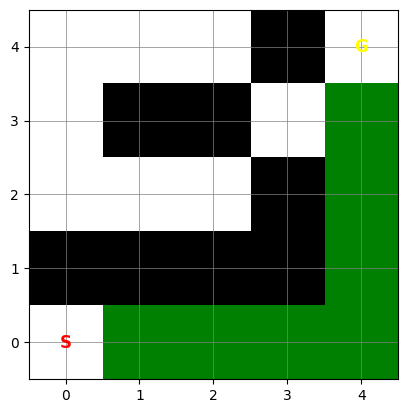

In [44]:
plot_maze(path)